In [1]:
import numpy as np

In [2]:
from gadget_tools import Snapshot, read_positions_all_files

In [3]:
from pm_tools import assign_density

In [4]:
# import yt
# import numpy as np
# import yt.units as units
# import pylab
import sphviewer
from sphviewer.tools import QuickView

In [6]:
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

In [7]:
L=150
N=256
i=20

In [8]:
snap = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [9]:
posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo')

/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.0.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.1.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.2.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.3.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.4.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.5.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.6.hdf5


In [10]:
# posb = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Gas')

In [28]:
deltad = assign_density(posd, L, scheme='NGP')#, overdensity=False)

In [ ]:
# deltab = assign_density(posb, L, scheme='NGP')

In [ ]:
deltad_slice = deltad[100:150].mean(axis=0)

In [ ]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [ ]:
deltad_slice

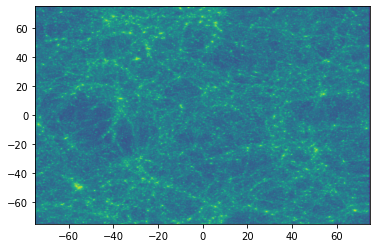

In [29]:
qv = QuickView(posd, r='infinity', nb=8)

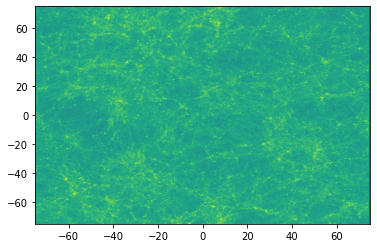

In [10]:
qv = QuickView(posd, r='infinity', nb=8)

In [11]:
qv

In [30]:
mass = np.ones(posd.shape[0])*snap.mass_table[1]

In [32]:
mass

array([1.71020401, 1.71020401, 1.71020401, ..., 1.71020401, 1.71020401,
       1.71020401])

In [33]:
prtcls = sphviewer.Particles(posd,mass)

In [34]:
scn = sphviewer.Scene(prtcls)

In [61]:
scn.update_camera(r=100)
scn.update_camera(zoom=2.5)

In [62]:
rndr = sphviewer.Render(scn)

In [63]:
rndr.set_logscale()
img = rndr.get_image()

Text(0, 0.5, 'Y')

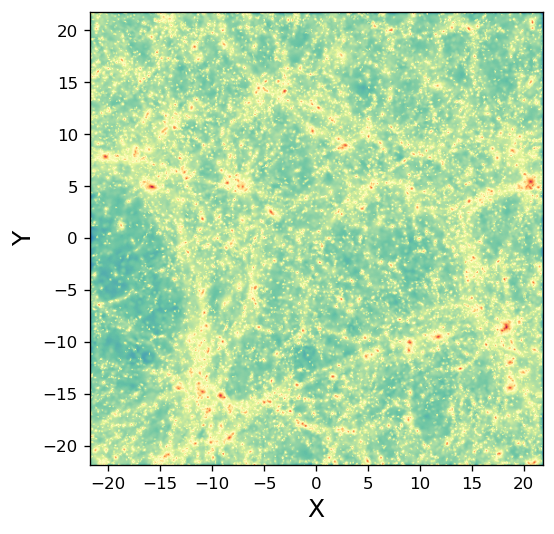

In [64]:
extent = rndr.get_extent()
fig = plt.figure(dpi=120,figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.imshow(img, extent=extent, origin='lower', cmap='Spectral_r')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

In [44]:
camera = scn.Camera.get_params()
camera

{'x': 75.00001525878906,
 'y': 75.0,
 'z': 75.00000762939453,
 'r': 259.807577087002,
 't': 0,
 'p': 0,
 'zoom': 1,
 'roll': 0,
 'xsize': 500,
 'ysize': 500,
 'extent': None}

In [31]:
vars(snap)

{'h5py': <module 'h5py' from '/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/h5py/__init__.py'>,
 'filename': '/scratch/cprem/sims/L150_N256_Cp18/r1/snaps/snapdir_020/snapshot_020.0.hdf5',
 'filetype': 'gadget_hdf5',
 'N_prtcl_thisfile': array([      0, 1939103,       0,       0,       0,       0], dtype=uint32),
 'mass_table': array([0.        , 1.71020401, 0.        , 0.        , 0.        ,
        0.        ]),
 'scale_factor': 0.9999999999999999,
 'redshift': 2.220446049250313e-16,
 'N_prtcl_total': array([       0, 16777216,        0,        0,        0,        0],
       dtype=uint64),
 'num_files': 8,
 'box_size': 150.0,
 'Omega_m_0': 0.3063375,
 'Omega_Lam_0': 0.6936625,
 'Hubble_param': 0.6781,
 'num_part_types': 6.0,
 'params': <Attributes of HDF5 object at 47147476165312>,
 'prtcl_types': ['Gas', 'Halo', 'Disk', 'Bulge', 'Stars', 'Bndry']}

In [24]:
data = dict(density = (1+deltad, "dimensionless"))
bbox = np.array([[0, 1], [0, 1], [0, 1]])*L
ds = yt.load_uniform_grid(data, deltad.shape, length_unit="Mpc", bbox=bbox, nprocs=32)

yt : [INFO     ] 2021-03-09 18:27:42,792 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-03-09 18:27:42,793 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2021-03-09 18:27:42,794 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-09 18:27:42,795 Parameters: domain_right_edge         = [150. 150. 150.]
yt : [INFO     ] 2021-03-09 18:27:42,796 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-09 18:38:58,416 xlim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,418 ylim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,419 xlim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,420 ylim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,421 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2021-03-09 18:38:58,889 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,891 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,893 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,895 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,897 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,899 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WAR


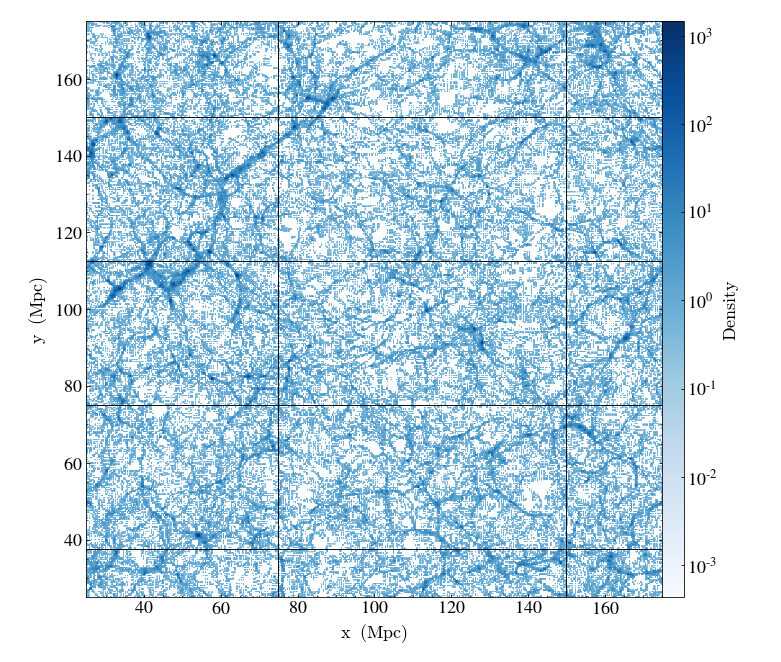

In [46]:
slc = yt.SlicePlot(ds, "z", ["density"], origin='lower-left-domain', width=(150,150), center=(100,100,50))
slc.set_cmap("density", "Blues")
slc.annotate_grids(cmap=None)
slc.show()

In [68]:
fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(7.5,4), dpi=150)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-2,vmax=5e2), cmap='inferno')
cb1 = fig1.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")

In [70]:
im2 = ax2.imshow(deltab_slice+1, norm=LogNorm(vmin=5e-2,vmax=5e2), cmap='inferno', alpha=1)
cb2 = fig1.colorbar(im2,ax=ax2)
cb2.set_label(r"$(1+\delta)$")

In [15]:
# snap = Snapshot('/mnt/home/student/cprem/tools/dice/example/dice_iso.g2')

reading the first block (header) which contains  [8]  bytes
Header block is read and it contains  0 bytes.


In [17]:
# snap.positions()